## Airline Review Classification


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
# Read the Dataset
data=pd.read_csv(r"D:\AI&ML Project\Airline_Reviews.csv")
data.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [3]:
data.shape

(23171, 20)

### Checking for Null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [5]:
### drop unnecessary data

data1=data.drop(['Inflight Entertainment','Wifi & Connectivity','Aircraft','Value For Money',
                 'Cabin Staff Service','Unnamed: 0','Review Date','Review_Title','Review'],axis=1)

In [6]:
data1['Overall_Rating']=data1['Overall_Rating'].replace(['1','2','3','4','5','6','7','8','9','n'],['1','2','3','4','5','6','7','8','9','10'])

In [7]:
data1['Overall_Rating'].value_counts()

Overall_Rating
1     11595
2      2296
9      1768
8      1757
3      1356
7      1192
4       859
10      842
5       830
6       676
Name: count, dtype: int64

### Handling Missing Values

In [8]:
data1['Type Of Traveller'] = data1['Type Of Traveller'].fillna(data1['Type Of Traveller'].mode()[0])
data1['Seat Type'] = data1['Seat Type'].fillna(data1['Seat Type'].mode()[0]) 
data1['Seat Comfort'] = data1['Seat Comfort'].fillna(data1['Seat Comfort'].mode()[0])
data1['Route'] = data1['Route'].fillna(data1['Route'].mode()[0])
data1['Date Flown'] = data1['Date Flown'].fillna(data1['Date Flown'].mode()[0])
data1['Food & Beverages'] = data1['Food & Beverages'].fillna(data1['Food & Beverages'].mode()[0]) 
data1['Ground Service'] = data1['Ground Service'].fillna(data1['Ground Service'].mode()[0])

#For the above columns we are using mode instead of median even though numerical values are present 
#becouse the column consists of categories(0 to 5).So its considered as categorical data

In [9]:
data1[['Month Flown','Year Flown']] = data1['Date Flown'].str.split(expand=True)

In [10]:
data1['Origin'] = data1.Route.str.split(' to ',expand=True)[0]
data1['Destination'] = data1.Route.str.split(' to ',expand=True)[1] 
# Route column has 3 values i.e., eg. Place A to Place B via Place C, so inorder to chose
# we gave indices for Moroni as 0 & Moheli as 1, and then run the split function again to remove "via" 
data1['Destination'] = data1.Destination.str.split(' via ',expand=True)[0]

In [11]:
del data1['Date Flown']

In [12]:
del data1['Route']

In [13]:
data1['Origin'] = data1['Origin'].replace(['Tel Avivito Malta (MLA)','Bangalore toChennai','JFK toTLV via Baku','Krabi toBangkok','Hong Kong To Shanghai',
                                           'Edinburgh To Fuerteventura','Nuremburg toHamburg','Mumbai toJaipur','Sydney to New York via Soul',
                                           'London Gatwick Bangkok','SIN toi MFM','Jakartato Yogyakarta','Cardiff-Halta return','KIV-LIS',
                                           'GRR-ORD','LCY-FRA','NAP-RMF return','LEB-BOS','Bucharest-Brussels','Da Nang Hong Kong','New-York',
                                           'LHR-DXB','Dublin Charlotte','Kansas City via Dallas Ft Worth','Sydney via Singapore','Geneva via Brussels',
                                           'Nursultan via Dubai','Denpasar Medan via Jakarta','Auckland Denpasar via Sydney / Melbourne',
                                           'Lima via Santiago','Manila via Los Angeles','Dar es Salaam via Kigali','Singapore via Sydney',
                                           'Grand Rapidsvto Orlando via Chicago','Toronto via Varadero','Bangkok via Humbai','A Coruna via Bilbao',
                                           'LHR-DXB','Paris Orly Los Angeles','Newark Los Angeles','Honolulu Seattle','San Paulo'], 
                                          ['Tel Aviv (MLA)','Bangalore','JFK','Krabi','Hong Kong','Edinburgh','Nuremburg','Mumbai',
                                           'Sydney','London Gatwick','SIN','Jakarta','Cardiff','KIV','GRR','LCY','NAP','LEB','Bucharest',
                                           'Da Nang','New York','LHR','Dublin','Kansas City','Sydney','Geneva','Nursultan','Denpasar Medan', 
                                           'Auckland Denpasar','Lima','Manila','Dar es Salaam','Singapore','Grand Rapidsvto Orlando',
                                           'Toronto','Bangkok','A Coruna','LHR','Paris Orly','Newark','Honolulu','San Paulo'])

In [14]:
#Destination recorrections
j=0
row_num = [2172,3788,5112,5368,7000,8314,9107,10589,12993,17759,20572,
          20930,2225,2380,4339,5182,5785,6382,10991,12573,17051,21497,
          4293,6215,9787,10207,12372,13556,16022,17217,17732,18774,
          19462,20112,22449,11584,10001,12258,10886]
new_des = ['Malta','Chennai','TLV','Bangkok','Shanghai','Fuerteventura','Hamburg',
           'Jaipur','New York','Bangkok','MFM','Yogyakarta','Malta','LIS','ORD','FRA',
          'RMF','BOS','Brussels','Hong Kong','DXB','Charlotte','Dallas Ft Worth',
           'Brussels','Dubai','Jakarta','Sydney / Melbourne','Santiago','Los Angeles','Kigali',
          'Sydney','Chicago','Varadero','Mumbai','Bilbao','Dallas','Los Angeles','Los Angeles','Seattle']

for i in row_num:
    data1.at[i,'Destination'] = new_des[j]
    j+=1

In [15]:
new_column_order = ['Airline Name','Seat Type','Type Of Traveller','Origin',
                   'Destination','Month Flown','Year Flown','Verified','Seat Comfort',
                   'Food & Beverages','Ground Service','Overall_Rating','Recommended']

In [16]:
# Reordering the columns of given data to our desired manner
data1 = data1.reindex(columns = new_column_order)

In [17]:
data1.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,AB Aviation,Economy Class,Solo Leisure,Moroni,Moheli,November,2019,True,4.0,4.0,4.0,9,yes
1,AB Aviation,Economy Class,Solo Leisure,Moroni,Anjouan,June,2019,True,2.0,1.0,1.0,1,no
2,AB Aviation,Economy Class,Solo Leisure,Anjouan,Dzaoudzi,June,2019,True,2.0,1.0,1.0,1,no
3,Adria Airways,Economy Class,Solo Leisure,Frankfurt,Pristina,September,2019,False,1.0,1.0,1.0,1,no
4,Adria Airways,Economy Class,Couple Leisure,Sofia,Amsterdam,September,2019,True,1.0,1.0,1.0,1,no


### Data Visualization

In [18]:
data1.describe()

,Seat Comfort,Food & Beverages,Ground Service
count,23171.000000,23171.000000,23171.000000
mean,2.328126,1.972207,2.073713
std,1.465062,1.422340,1.523264
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000
75%,4.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000


[Text(0.5, 0, 'index')]

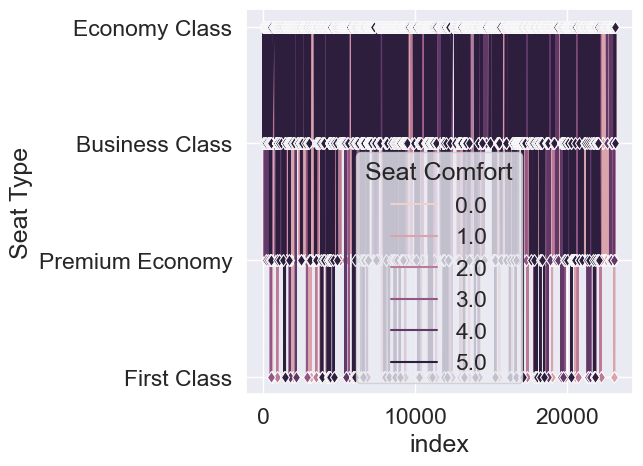

In [19]:
#line plot in seaborn

sns.set(rc={'figure.figsize':[5,5]})
sns.set(font_scale=1.5)
fig=sns.lineplot(x=data1.index,y=data1['Seat Type'],markevery=1,marker='d',hue=data1['Seat Comfort'])
fig.set(xlabel='index')

<Axes: xlabel='Seat Type'>

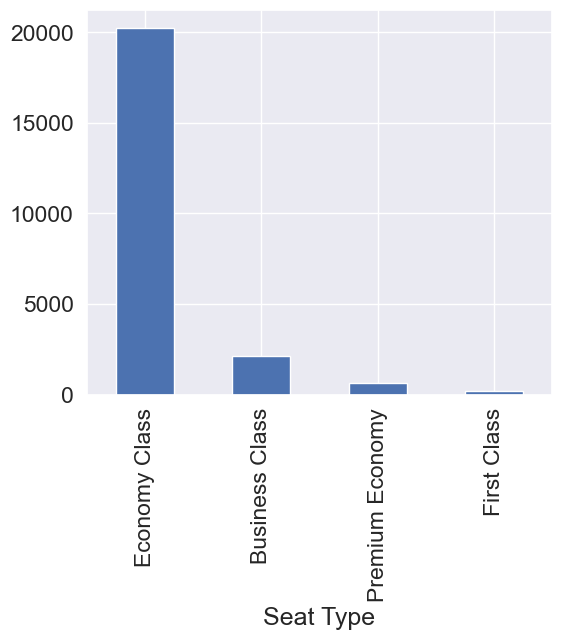

In [20]:
plt.figure(figsize=(6,5))
data1['Seat Type'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x2a3b789a210>,
 [Text(-0.4255806105829949, -1.0143377858957072, 'EC'),
  Text(0.5370556832029272, 0.9599849963095451, 'BC'),
  Text(0.15134436463791998, 1.0895388397355756, 'PE'),
  Text(0.027737504813067807, 1.099650231131129, 'FC')],
 [Text(-0.23213487849981534, -0.5532751559431129, '87.355'),
  Text(0.292939463565233, 0.5236281798052064, '9.054'),
  Text(0.08255147162068362, 0.5942939125830412, '2.788'),
  Text(0.015129548079855165, 0.5998092169806156, '0.803')])

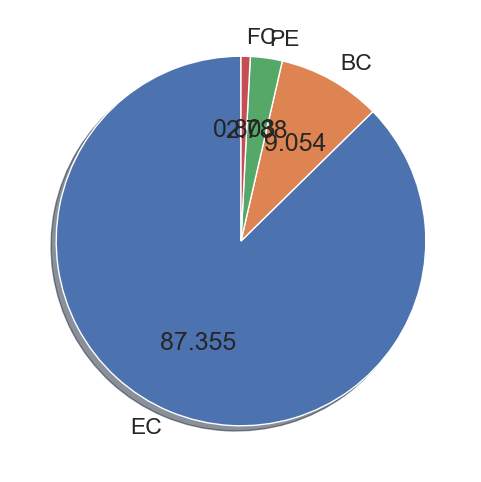

In [21]:
plt.figure(figsize=(6,6))
plt.pie(data1['Seat Type'].value_counts(),startangle=90,autopct='%.3f',
       labels=['EC','BC','PE','FC'],shadow=True)

<Axes: xlabel='Type Of Traveller', ylabel='Overall_Rating'>

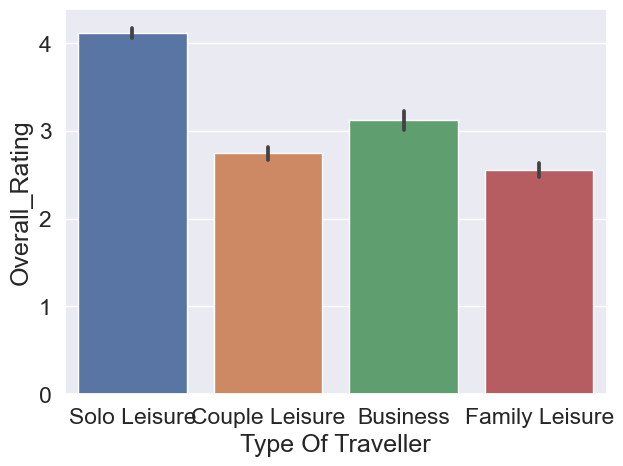

In [22]:
plt.figure(figsize=(7,5))
data1['Overall_Rating'] = pd.to_numeric(data1['Overall_Rating'], errors='coerce')
sns.barplot(data=data1,x='Type Of Traveller',y='Overall_Rating')

<Figure size 500x500 with 0 Axes>

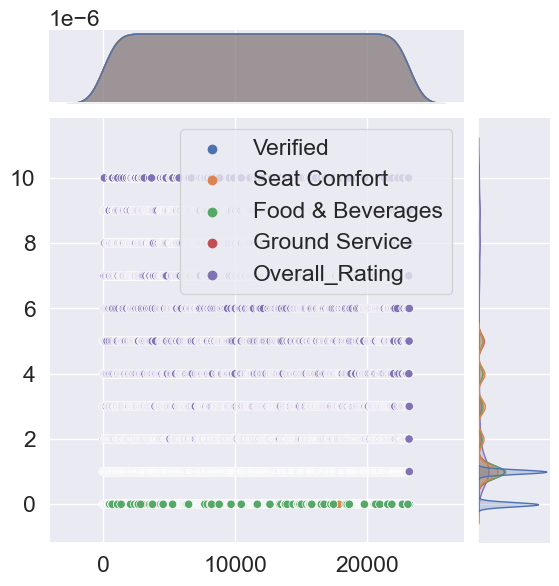

In [23]:
plt.figure(figsize=(5,5))
sns.jointplot(data1)

<Axes: >

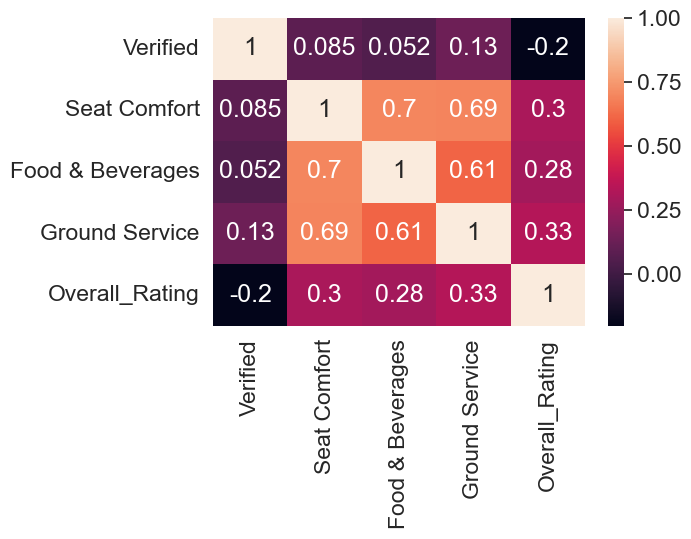

In [24]:
plt.subplots(figsize=(6,4))
sns.heatmap(data1.corr(numeric_only=True),annot=True)

### Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le10 = LabelEncoder()

In [26]:
data1['Airline Name'] = le1.fit_transform(data1['Airline Name'])
data1['Seat Type'] = le2.fit_transform(data1['Seat Type'])
data1['Type Of Traveller'] = le3.fit_transform(data1['Type Of Traveller'])
data1['Origin'] = le4.fit_transform(data1['Origin'])
data1['Destination'] = le5.fit_transform(data1['Destination'])
data1['Month Flown'] = le6.fit_transform(data1['Month Flown'])
data1['Year Flown'] = le7.fit_transform(data1['Year Flown'])
data1['Verified'] = le8.fit_transform(data1['Verified'])
data1['Overall_Rating'] = le9.fit_transform(data1['Overall_Rating'])
data1['Recommended'] = le10.fit_transform(data1['Recommended'])

In [27]:
data1.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Recommended
0,0,1,3,1278,1545,9,6,1,4.0,4.0,4.0,8,1
1,0,1,3,1278,107,6,6,1,2.0,1.0,1.0,0,0
2,0,1,3,79,672,6,6,1,2.0,1.0,1.0,0,0
3,4,1,3,632,1927,11,6,0,1.0,1.0,1.0,0,0
4,4,1,1,1834,99,11,6,1,1.0,1.0,1.0,0,0


### Splitting data into training and testing data

In [32]:
X = data1.iloc[:,0:12].values
Y = data1.iloc[:,12:13].values

In [33]:
X

array([[  0.,   1.,   3., ...,   4.,   4.,   8.],
       [  0.,   1.,   3., ...,   1.,   1.,   0.],
       [  0.,   1.,   3., ...,   1.,   1.,   0.],
       ...,
       [487.,   1.,   0., ...,   2.,   1.,   2.],
       [487.,   0.,   0., ...,   3.,   1.,   5.],
       [487.,   1.,   3., ...,   1.,   1.,   0.]])

In [34]:
Y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [35]:
data1.Recommended.value_counts()

Recommended
0    15364
1     7807
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
import pickle
pickle.dump(ss,open('ar_ss.pkl','wb'))

In [38]:
import pickle
pickle.dump(le1,open('le1.pkl','wb'))
pickle.dump(le2,open('le2.pkl','wb'))
pickle.dump(le3,open('le3.pkl','wb'))
pickle.dump(le4,open('le4.pkl','wb'))
pickle.dump(le5,open('le5.pkl','wb'))
pickle.dump(le6,open('le6.pkl','wb'))
pickle.dump(le7,open('le7.pkl','wb'))
pickle.dump(le8,open('le8.pkl','wb'))
pickle.dump(le9,open('le9.pkl','wb'))
pickle.dump(le10,open('le10.pkl','wb'))

## Model Building

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=50)

In [40]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [41]:
pred_dt = dt.predict(X_test)
pred_dt

array([0, 1, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
fpr_dt,tpr_dt,threshold_dt=roc_curve(Y_test,pred_dt)

print(classification_report(Y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3058
           1       0.92      0.86      0.89      1577

    accuracy                           0.93      4635
   macro avg       0.92      0.91      0.92      4635
weighted avg       0.93      0.93      0.93      4635



In [43]:
roc_auc_dt=auc(fpr_dt,tpr_dt)
print("roc_auc_dt: ",roc_auc_dt)

roc_auc_dt:  0.9104432255198898


In [44]:
cm_dt = confusion_matrix(Y_test,pred_dt)
print("Cm_dt: ",cm_dt)

Cm_dt:  [[2933  125]
 [ 218 1359]]


In [45]:
as_dt = accuracy_score(Y_test,pred_dt)
print("As_dt: ",as_dt)

As_dt:  0.9259978425026969


### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [48]:
pred_knn = knn.predict(X_test)
pred_knn

array([0, 1, 0, ..., 0, 1, 0])

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
fpr_knn,tpr_knn,threshold_knn=roc_curve(Y_test,pred_knn)

print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3058
           1       0.92      0.90      0.91      1577

    accuracy                           0.94      4635
   macro avg       0.93      0.93      0.93      4635
weighted avg       0.94      0.94      0.94      4635



In [50]:
roc_auc_knn=auc(fpr_knn,tpr_knn)
print("roc_auc_knn: ",roc_auc_knn)

roc_auc_knn:  0.9308984241672207


In [51]:
cm_knn = confusion_matrix(Y_test,pred_knn)
print("Cm_knn: ",cm_knn)

Cm_knn:  [[2934  124]
 [ 154 1423]]


In [52]:
as_knn = accuracy_score(Y_test,pred_knn)
print("As_knn: ",as_knn)

As_knn:  0.9400215749730313


### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()

In [54]:
Lr.fit(X_train,Y_train)

LogisticRegression()

In [55]:
pred_Lr = Lr.predict(X_test)
pred_Lr

array([0, 1, 0, ..., 0, 1, 0])

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
fpr_Lr,tpr_Lr,threshold_Lr=roc_curve(Y_test,pred_Lr)

print(classification_report(Y_test,pred_Lr))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3058
           1       0.88      0.81      0.84      1577

    accuracy                           0.90      4635
   macro avg       0.89      0.88      0.88      4635
weighted avg       0.90      0.90      0.90      4635



In [57]:
roc_auc_Lr=auc(fpr_Lr,tpr_Lr)
print("roc_auc_Lr: ",roc_auc_Lr)

roc_auc_Lr:  0.8762592623773812


In [58]:
cm_Lr = confusion_matrix(Y_test,pred_Lr)
print("Cm_Lr: ",cm_Lr)

Cm_Lr:  [[2881  177]
 [ 299 1278]]


In [59]:
as_Lr = accuracy_score(Y_test,pred_Lr)
print("As_Lr: ",as_Lr)

As_Lr:  0.8973031283710895


### Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()

In [61]:
Gnb.fit(X_train,Y_train)

GaussianNB()

In [62]:
pred_nb=Gnb.predict(X_test)
pred_nb

array([0, 1, 0, ..., 0, 1, 0])

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
fpr_nb,tpr_nb,threshold_nb=roc_curve(Y_test,pred_nb)

print(classification_report(Y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3058
           1       0.80      0.83      0.82      1577

    accuracy                           0.87      4635
   macro avg       0.86      0.86      0.86      4635
weighted avg       0.87      0.87      0.87      4635



In [64]:
roc_auc_nb=auc(fpr_nb,tpr_nb)
print("roc_auc_Nb: ",roc_auc_nb)

roc_auc_Nb:  0.8625532041076079


In [65]:
cm_nb = confusion_matrix(Y_test,pred_nb)
print("Cm_Nb: ",cm_nb)

Cm_Nb:  [[2739  319]
 [ 269 1308]]


In [66]:
as_nb = accuracy_score(Y_test,pred_nb)
print("As_Nb: ",as_nb)

As_Nb:  0.8731391585760517


### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=2)

In [68]:
Rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2)

In [69]:
pred_rfc=Rfc.predict(X_test)
pred_rfc

array([0, 1, 0, ..., 0, 0, 0])

In [70]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
fpr_rfc,tpr_rfc,threshold_rfc=roc_curve(Y_test,pred_rfc)

print(classification_report(Y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3058
           1       0.95      0.90      0.92      1577

    accuracy                           0.95      4635
   macro avg       0.95      0.94      0.94      4635
weighted avg       0.95      0.95      0.95      4635



In [71]:
roc_auc_rfc=auc(fpr_rfc,tpr_rfc)
print("roc_auc_Rfc: ",roc_auc_rfc)

roc_auc_Rfc:  0.9364974268351504


In [72]:
cm_rfc = confusion_matrix(Y_test,pred_rfc)
print("Cm_Rfc: ",cm_rfc)

Cm_Rfc:  [[2976   82]
 [ 158 1419]]


In [73]:
as_rfc = accuracy_score(Y_test,pred_rfc)
print("As_Rfc: ",as_rfc)

As_Rfc:  0.948220064724919


### Support Vector(SVC)

In [74]:
from sklearn.svm import SVC
svc = SVC()

In [75]:
svc.fit(X_train,Y_train)

SVC()

In [76]:
pred_svc=svc.predict(X_test)
pred_svc

array([0, 1, 0, ..., 0, 1, 0])

In [77]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
fpr_svc,tpr_svc,threshold_svc=roc_curve(Y_test,pred_svc)

print(classification_report(Y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3058
           1       0.93      0.88      0.90      1577

    accuracy                           0.94      4635
   macro avg       0.93      0.92      0.93      4635
weighted avg       0.94      0.94      0.94      4635



In [78]:
roc_auc_svc=auc(fpr_svc,tpr_svc)
print("roc_auc_svc: ",roc_auc_svc)

roc_auc_svc:  0.9213227216117231


In [79]:
cm_svc = confusion_matrix(Y_test,pred_svc)
print("Cm_svc: ",cm_svc)

Cm_svc:  [[2953  105]
 [ 194 1383]]


In [80]:
as_svc = accuracy_score(Y_test,pred_svc)
print("As_svc: ",as_svc)

As_svc:  0.9354908306364617


### XGBoost

In [81]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [82]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
pred_xgb=xgb.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
fpr_xgb,tpr_xgb,threshold_xgb=roc_curve(Y_test,pred_xgb)

print(classification_report(Y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3058
           1       0.85      0.85      0.85      1577

    accuracy                           0.90      4635
   macro avg       0.88      0.89      0.89      4635
weighted avg       0.90      0.90      0.90      4635



In [85]:
roc_auc_xgb=auc(fpr_xgb,tpr_xgb)
print("roc_auc_xgb: ",roc_auc_xgb)

roc_auc_xgb:  0.8862301984088636


In [86]:
cm_xgb = confusion_matrix(Y_test,pred_xgb)
print("Cm_xgb: ",cm_xgb)

Cm_xgb:  [[2814  244]
 [ 233 1344]]


In [87]:
as_xgb = accuracy_score(Y_test,pred_xgb)
print("As_xgb: ",as_xgb)

As_xgb:  0.8970873786407767


In [88]:
pred_rfc1=Rfc.predict(X_train)
print(classification_report(Y_train,pred_rfc1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12306
           1       0.99      0.98      0.99      6230

    accuracy                           0.99     18536
   macro avg       0.99      0.99      0.99     18536
weighted avg       0.99      0.99      0.99     18536



In [89]:
Rfc.predict([[4,71,1,3,900,1133,1,6,1,5,5,5]])

array([1])

In [90]:
# As there is a very less difference between accuracies of training and testing models, there is no issue of overfitting

### Compare the Model accuracy

In [91]:
compare = pd.DataFrame({'Model':['DecisionTree Classification','K-Nearest Neighbours','Logistic Regression','Naive Bayes Classification','RandomForest Classification','Support Vector Machine','XGBClassifier'],
                   'roc_auc':[roc_auc_dt,roc_auc_knn,roc_auc_Lr,roc_auc_nb,roc_auc_rfc,roc_auc_svc,roc_auc_xgb],
                   'Accuracy':[as_dt,as_knn,as_Lr,as_nb,as_rfc,as_svc,as_xgb]})

In [92]:
compare

,Model,roc_auc,Accuracy
0,DecisionTree Classification,0.910443,0.925998
1,K-Nearest Neighbours,0.930898,0.940022
2,Logistic Regression,0.876259,0.897303
3,Naive Bayes Classification,0.862553,0.873139
4,RandomForest Classification,0.936497,0.948220
5,Support Vector Machine,0.921323,0.935491
6,XGBClassifier,0.886230,0.897087


In [93]:
maxi=0
for i in range(len(compare['Model'])):
    if compare.iloc[i:i+1,1:2].values>maxi:
        maxi=compare.iloc[i:i+1,1:2].values
        model=compare.iloc[i:i+1,0:1].values
    else:
        pass
print('Best Accuracy Score is:\n',maxi,'by',model)

maxi=0
for i in range(len(compare['Model'])):
    if compare.iloc[i:i+1,2:3].values>maxi:
        maxi=compare.iloc[i:i+1,2:3].values
        model=compare.iloc[i:i+1,0:1].values
    else:
        pass
print('Best roc_auc Score is:',maxi,'by',model)


Best Accuracy Score is:
 [[0.93649743]] by [['RandomForest Classification']]
Best roc_auc Score is: [[0.94822006]] by [['RandomForest Classification']]


### Saving the model

In [94]:
import pickle
pickle.dump(Rfc,open('ar_rfc.pkl','wb'))